# Taller 2b

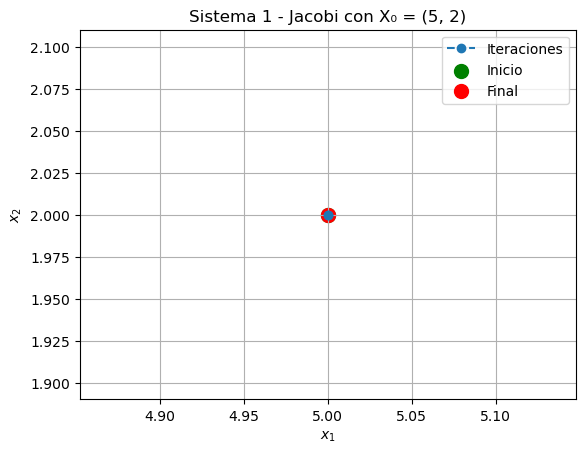

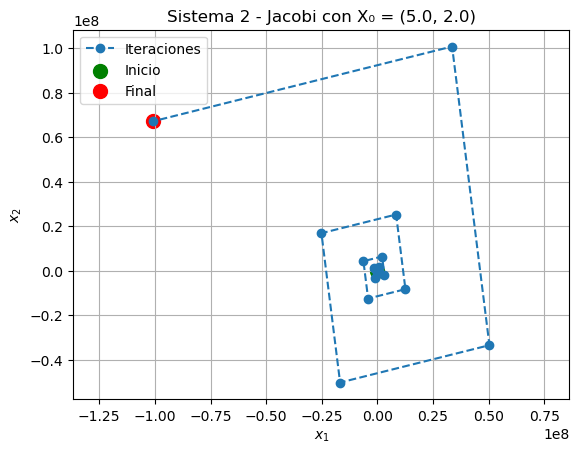

⚠️ Posible divergencia detectada con X₀ = (5.0, 2.0)


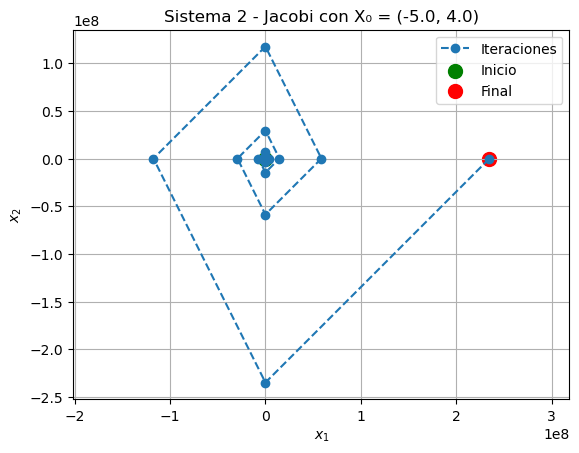

⚠️ Posible divergencia detectada con X₀ = (-5.0, 4.0)


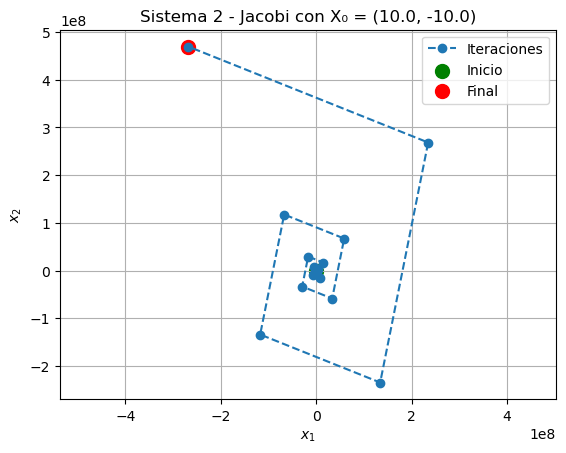

⚠️ Posible divergencia detectada con X₀ = (10.0, -10.0)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi(A, b, x0, tol=1e-5, max_iter=50):
    D = np.diag(np.diag(A))
    R = A - D
    D_inv = np.linalg.inv(D)
    x = x0.copy()
    trajectory = [x.copy()]

    for _ in range(max_iter):
        x_new = D_inv @ (b - R @ x)
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    return np.array(trajectory)

def plot_trajectory(traj, title):
    plt.plot(traj[:, 0], traj[:, 1], marker='o', linestyle='--', label="Iteraciones")
    plt.scatter(traj[0, 0], traj[0, 1], color='green', label='Inicio', s=100)
    plt.scatter(traj[-1, 0], traj[-1, 1], color='red', label='Final', s=100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

# ====================
# PRIMER SISTEMA
# ====================
A1 = np.array([[1, 1],
               [-2, 5]])
b1 = np.array([7, 0])
x0_1 = np.array([5.0, 2.0])

traj1 = jacobi(A1, b1, x0_1)
plot_trajectory(traj1, "Sistema 1 - Jacobi con X₀ = (5, 2)")

# ====================
# SEGUNDO SISTEMA
# ====================
A2 = np.array([[1, 1],
               [-2, 1]])
b2 = np.array([6, 0])
iniciales = [np.array([5.0, 2.0]), np.array([-5.0, 4.0]), np.array([10.0, -10.0])]

for i, x0 in enumerate(iniciales):
    traj2 = jacobi(A2, b2, x0)
    plot_trajectory(traj2, f"Sistema 2 - Jacobi con X₀ = {tuple(x0)}")

    if np.linalg.norm(traj2[-1] - traj2[-2]) > 1:
        print(f"⚠️ Posible divergencia detectada con X₀ = {tuple(x0)}")
